# Лабораторная 3

In [229]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg','pdf')

In [1]:
from scipy.stats import norm, cauchy, laplace, poisson, uniform
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import codecs
import csv

Размеры выборки:

In [2]:
units = [20, 100]

Нормальное распределение $\left(f(x)=\displaystyle\frac{e^{-x^2/2}}{\sqrt{2\pi}}\right)$:

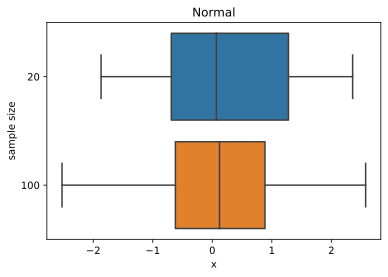

In [235]:
samples20 = norm.rvs(scale=1, loc=0, size=units[0])
samples100 = norm.rvs(scale=1, loc=0, size=units[1])
df = pd.DataFrame({
    'x': list(samples20) + list(samples100),
    'sample size': [units[0] for i in range(units[0])] + [units[1] for i in range(units[1])],
})
boxp = sns.boxplot(x = df['x'], y = df['sample size'], orient = "h", whis = 1.5)
boxp.set(title = "Normal")
plt.savefig("NormalBox.pdf")

Распределение Коши $\left(f(x)=\displaystyle\frac{1}{\pi}\frac{1}{x^2+1}\right)$:

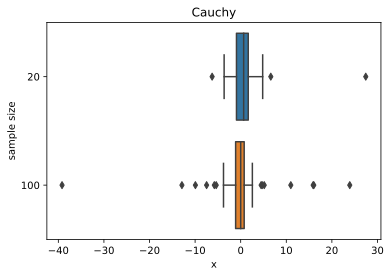

In [243]:
samples20 = cauchy.rvs(scale=1, loc=0, size=units[0])
samples100 = cauchy.rvs(scale=1, loc=0, size=units[1])
df = pd.DataFrame({
    'x': list(samples20) + list(samples100),
    'sample size': [units[0] for i in range(units[0])] + [units[1] for i in range(units[1])],
})
boxp = sns.boxplot(x = df['x'], y = df['sample size'], orient = "h", whis = 1.5)
boxp.set(title = "Cauchy")
plt.savefig("CauchyBox.pdf")

Распределение Лапласа $\left(f(x)=\displaystyle\frac{1}{\sqrt{2}}e^{-\sqrt{2}|x|}\right)$:

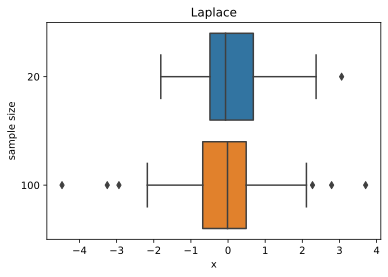

In [244]:
samples20 = laplace.rvs(scale=2 ** (-0.5), loc=0, size=units[0])
samples100 = laplace.rvs(scale=2 ** (-0.5), loc=0, size=units[1])
df = pd.DataFrame({
    'x': list(samples20) + list(samples100),
    'sample size': [units[0] for i in range(units[0])] + [units[1] for i in range(units[1])],
})
boxp = sns.boxplot(x = df['x'], y = df['sample size'], orient = "h", whis = 1.5)
boxp.set(title = "Laplace")
plt.savefig("LaplaceBox.pdf")

Распределение Пуассона $\left(p(k)=\displaystyle\frac{10^k}{k!}e^{-10}\right)$:

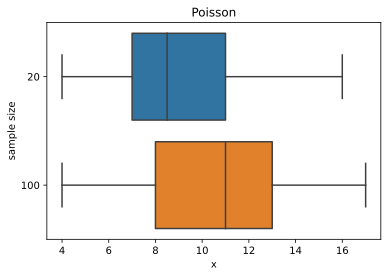

In [158]:
samples20 = poisson.rvs(10, size=units[0])
samples100 = poisson.rvs(10, size=units[1])
df = pd.DataFrame({
    'x': list(samples20) + list(samples100),
    'sample size': [units[0] for i in range(units[0])] + [units[1] for i in range(units[1])],
})
boxp = sns.boxplot(x = df['x'], y = df['sample size'], orient = "h", whis = 1.5)
boxp.set(title = "Poisson")
plt.savefig("PoissonBox.pdf")

Равномерное распределение $\left(f(x)=\begin{cases}
        \displaystyle\frac{1}{2\sqrt{3}}&\text{при}\;\;|x|\:\leq\sqrt{3}\\
        \;\;\;0&\text{при}\;\;|x|\:>\sqrt{3}\\
        \end{cases}\right)$:

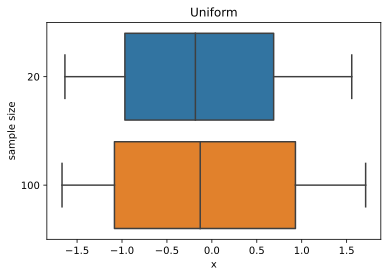

In [198]:
samples20 = uniform.rvs(loc=-3**0.5, scale=2*3**0.5,size=units[0])
samples100 = uniform.rvs(loc=-3**0.5, scale=2*3**0.5,size=units[1])
df = pd.DataFrame({
    'x': list(samples20) + list(samples100),
    'sample size': [units[0] for i in range(units[0])] + [units[1] for i in range(units[1])],
})
boxp = sns.boxplot(x = df['x'], y = df['sample size'], orient = "h", whis = 1.5)
boxp.set(title = "Uniform")
plt.savefig("UniformBox.pdf")

Выборочный квартиль $z_p$ порядка $p$ $\left(\displaystyle z_p = \begin{cases}\label{pqv}
        \displaystyle\;\;x_{([np]+1)}&\text{при}\;\;np\;\text{дробном,}\\
        \displaystyle\;\;\;\;\;x_{(np)}&\text{при}\;\;np\;\text{целом}
        \end{cases}\right)$:

In [104]:
def z_p(variational_series, p):
    pn = p * variational_series.size
    if (pn == int(pn)):
        return variational_series[int(pn)]
    return variational_series[int(pn) + 1]

Доля выбросов:

In [247]:
number_of_experiments = 1000
normal_outliers_perc_mean = []
cauchy_outliers_perc_mean = []
laplace_outliers_perc_mean = []
poisson_outliers_perc_mean = []
uniform_outliers_perc_mean = []
for j in range(len(units)):
    normal_outliers_perc = []
    cauchy_outliers_perc = []
    laplace_outliers_perc = []
    poisson_outliers_perc = []
    uniform_outliers_perc = []
    for i in range(number_of_experiments):
        sample = norm.rvs(scale=1, loc=0, size=units[j])
        sample.sort()
        Q_1 = z_p(sample, 1/4)
        Q_3 = z_p(sample, 3/4)
        X_1 = Q_1 - 1.5 * (Q_3 - Q_1)
        X_2 = Q_3 + 1.5 * (Q_3 - Q_1)
        outliers = [x for x in sample if x < X_1 or x > X_2]
        perc = len(outliers) / len(sample)
        normal_outliers_perc.append(perc)
        
        sample = cauchy.rvs(scale=1, loc=0, size=units[j])
        sample.sort()
        Q_1 = z_p(sample, 1/4)
        Q_3 = z_p(sample, 3/4)
        X_1 = Q_1 - 1.5 * (Q_3 - Q_1)
        X_2 = Q_3 + 1.5 * (Q_3 - Q_1)
        outliers = [x for x in sample if x < X_1 or x > X_2]
        perc = len(outliers) / len(sample)
        cauchy_outliers_perc.append(perc)
        
        sample = laplace.rvs(scale=2 ** (-0.5), loc=0, size=units[j])
        sample.sort()
        Q_1 = z_p(sample, 1/4)
        Q_3 = z_p(sample, 3/4)
        X_1 = Q_1 - 1.5 * (Q_3 - Q_1)
        X_2 = Q_3 + 1.5 * (Q_3 - Q_1)
        outliers = [x for x in sample if x < X_1 or x > X_2]
        perc = len(outliers) / len(sample)
        laplace_outliers_perc.append(perc)
        
        sample = poisson.rvs(10, size=units[j])
        sample.sort()
        Q_1 = z_p(sample, 1/4)
        Q_3 = z_p(sample, 3/4)
        X_1 = Q_1 - 1.5 * (Q_3 - Q_1)
        X_2 = Q_3 + 1.5 * (Q_3 - Q_1)
        outliers = [x for x in sample if x < X_1 or x > X_2]
        perc = len(outliers) / len(sample)
        poisson_outliers_perc.append(perc)
        
        sample = uniform.rvs(loc=-3**0.5, scale=2*3**0.5,size=units[j])
        sample.sort()
        Q_1 = z_p(sample, 1/4)
        Q_3 = z_p(sample, 3/4)
        X_1 = Q_1 - 1.5 * (Q_3 - Q_1)
        X_2 = Q_3 + 1.5 * (Q_3 - Q_1)
        outliers = [x for x in sample if x < X_1 or x > X_2]
        perc = len(outliers) / len(sample)
        uniform_outliers_perc.append(perc)
    normal_outliers_perc_mean.append(round(np.mean(normal_outliers_perc),3))
    cauchy_outliers_perc_mean.append(round(np.mean(cauchy_outliers_perc),3))
    laplace_outliers_perc_mean.append(round(np.mean(laplace_outliers_perc),3))
    poisson_outliers_perc_mean.append(round(np.mean(poisson_outliers_perc),3))
    uniform_outliers_perc_mean.append(round(np.mean(uniform_outliers_perc),3))

with codecs.open("outliners_tests.tex", 'w', 'utf-8') as f:
    f.write("Выборка&Доля выбросов" + r"\\" + "\hline ")
    for i in range(len(units)):
        f.write("Normal $n$ = " + str(units[i]) + "&" + str(normal_outliers_perc_mean[i]) + r"\\\hline ")
    for i in range(len(units)):
        f.write("Cauchy $n$ = " + str(units[i]) + "&" + str(cauchy_outliers_perc_mean[i]) + r"\\\hline ")
    for i in range(len(units)):
        f.write("Laplace $n$ = " + str(units[i]) + "&" + str(laplace_outliers_perc_mean[i]) + r"\\\hline ")
    for i in range(len(units)):
        f.write("Poisson $n$ = " + str(units[i]) + "&" + str(poisson_outliers_perc_mean[i]) + r"\\\hline ")
    for i in range(len(units)):
        f.write("Uniform $n$ = " + str(units[i]) + "&" + str(uniform_outliers_perc_mean[i]) + r"\\\hline ")

Теоретическая вероятность выбросов:

In [253]:
Q_1 = norm.ppf(1/4)
Q_3 = norm.ppf(3/4)
X_1 = Q_1 - 1.5 * (Q_3 - Q_1)
X_2 = Q_3 + 1.5 * (Q_3 - Q_1)
P = norm.cdf(X_1) + (1-norm.cdf(X_2))
norm_chs = [Q_1, Q_3, X_1, X_2, P]
norm_chs = [round(el,3) for el in norm_chs]
print(norm_chs)

Q_1 = cauchy.ppf(1/4)
Q_3 = cauchy.ppf(3/4)
X_1 = Q_1 - 1.5 * (Q_3 - Q_1)
X_2 = Q_3 + 1.5 * (Q_3 - Q_1)
P = cauchy.cdf(X_1) + (1-cauchy.cdf(X_2))
cauchy_chs = [Q_1, Q_3, X_1, X_2, P]
cauchy_chs = [round(el,3) for el in cauchy_chs]
print(cauchy_chs)

laplace_scaled = laplace(scale=2 ** (-0.5), loc=0)
Q_1 = laplace_scaled.ppf(1/4)
Q_3 = laplace_scaled.ppf(3/4)
X_1 = Q_1 - 1.5 * (Q_3 - Q_1)
X_2 = Q_3 + 1.5 * (Q_3 - Q_1)
P = laplace_scaled.cdf(X_1) + (1-laplace_scaled.cdf(X_2))
laplace_chs = [Q_1, Q_3, X_1, X_2, P]
laplace_chs = [round(el,3) for el in laplace_chs]
print(laplace_chs)

Q_1 = poisson(10).ppf(1/4)
Q_3 = poisson(10).ppf(3/4)
X_1 = Q_1 - 1.5 * (Q_3 - Q_1)
X_2 = Q_3 + 1.5 * (Q_3 - Q_1)
P = (poisson(10).cdf(X_1)-poisson(10).pmf(X_1)) + (1-poisson(10).cdf(X_2))
poisson_chs = [Q_1, Q_3, X_1, X_2, P]
poisson_chs = [round(el,3) for el in poisson_chs]
print(poisson_chs)

unif_scaled = uniform(loc=-3**0.5, scale=2*3**0.5)
Q_1 = unif_scaled.ppf(1/4)
Q_3 = unif_scaled.ppf(3/4)
X_1 = Q_1 - 1.5 * (Q_3 - Q_1)
X_2 = Q_3 + 1.5 * (Q_3 - Q_1)
P = unif_scaled.cdf(X_1) + (1-unif_scaled.cdf(X_2))
unif_chs = [Q_1, Q_3, X_1, X_2, P]
unif_chs = [round(el,3) for el in unif_chs]
print(unif_chs)

with codecs.open("outliners_theoretical.tex", 'w', 'utf-8') as f:
    writer = csv.writer(f, delimiter = '&')
    hline = "\hline\n"
    line_names = ["Распределение", r"$Q^{\text{т}}_1$",r"$Q^{\text{т}}_3$",r"$X^{\text{т}}_1\;\eqref{whiskers}$",
                r"$X^{\text{т}}_2\;\eqref{whiskers}$", r"$P^{\text{т}}_{\text{в}}\;\eqref{abscontprob},\;\eqref{discrprob}$\\"]
    writer.writerow(line_names)
    f.write(hline)
    norm_chs.insert(0, "Нормальное распределение")
    norm_chs[len(norm_chs) - 1] = str(norm_chs[len(norm_chs) - 1]) + r"\\"
    writer.writerow(norm_chs)
    f.write(hline)
    cauchy_chs.insert(0, "Распределение Коши")
    cauchy_chs[len(cauchy_chs) - 1] = str(cauchy_chs[len(cauchy_chs) - 1]) + r"\\"
    writer.writerow(cauchy_chs)
    f.write(hline)
    laplace_chs.insert(0, "Распределение Лапласа")
    laplace_chs[len(laplace_chs) - 1] = str(laplace_chs[len(laplace_chs) - 1]) + r"\\"
    writer.writerow(laplace_chs)
    f.write(hline)
    poisson_chs.insert(0, "Распределение Пуассона")
    poisson_chs[len(poisson_chs) - 1] = str(poisson_chs[len(poisson_chs) - 1]) + r"\\"
    writer.writerow(poisson_chs)
    f.write(hline)
    unif_chs.insert(0, "Равномерное распределение")
    unif_chs[len(unif_chs) - 1] = str(unif_chs[len(unif_chs) - 1]) + r"\\"
    writer.writerow(unif_chs)
    f.write(hline)

[-0.674, 0.674, -2.698, 2.698, 0.007]
[-1.0, 1.0, -4.0, 4.0, 0.156]
[-0.49, 0.49, -1.961, 1.961, 0.062]
[8.0, 12.0, 2.0, 18.0, 0.008]
[-0.866, 0.866, -3.464, 3.464, 0.0]
